<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_LASSO_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> D) AR + LASSO Regression <h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from math import log
from sklearn.preprocessing import StandardScaler

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Mounted at /content/drive


In [3]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [4]:
CPI.shape

(758, 3)

In [5]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [6]:
data.shape

(759, 104)

CPI series has already been differentiated.

In [7]:
data = data.drop([758])

In [8]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [9]:
data = data.drop(columns = ["sasdate"]).reset_index(drop=True)

In [10]:
data.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.0223

In [11]:
CPI_data = CPI.merge(data, left_index = True, right_index = True, how = "left")

In [12]:
CPI_data.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-03-01,-0.001036,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-04-01,0.000345,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-05-01,0.002066,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-06-01,0.002405,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,

In [13]:
date = CPI_data["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
753,2021-12-01
754,2022-01-01
755,2022-02-01
756,2022-03-01


In [14]:
CPI_data = CPI_data.drop(columns = ["sasdate", "CPIAUCSL"])

Let's check the variance distribution for each variable.

(array([1.21118846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17591112e-05]),
 array([3.55130748e-10, 8.17696545e+02, 1.63539309e+03, 2.45308963e+03,
        3.27078618e+03, 4.08848272e+03, 4.90617927e+03, 5.72387581e+03,
        6.54157236e+03, 7.35926890e+03, 8.17696545e+03, 8.99466199e+03,
        9.81235853e+03, 1.06300551e+04, 1.14477516e+04, 1.22654482e+04]),
 <a list of 15 Patch objects>)

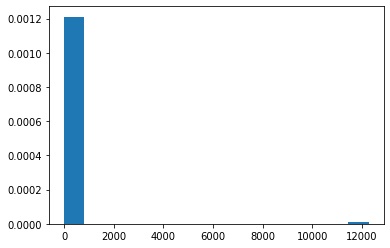

In [15]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

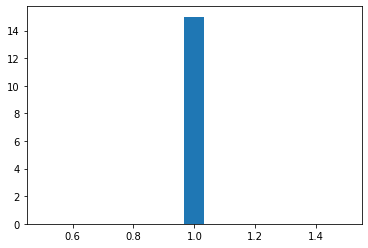

In [16]:
scaler = StandardScaler()
scaler.fit(CPI_data)
CPI_data_st = scaler.transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [17]:
CPI_data_st = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.258455,0.108583,0.193494,0.906406,0.161428,1.708178,1.151487,0.607606,0.542204,0.090167,1.061919,0.575036,2.326189,2.269714,1.334968,1.395448,-0.139663,-0.712616,1.473948,-1.721245,-0.607043,-0.222529,-0.993786,-0.140494,-0.054644,-1.373790,-0.879914,-1.245373,-0.243808,0.435923,0.737411,-0.660331,-0.520031,1.305124,1.472550,0.718124,0.277493,0.505487,0.434448,0.650888,-0.400881,0.008493,-0.906949,0.684372,-0.648127,0.633820,1.880358,1.445484,-0.611358,0.149388,1.037944,1.901051,-0.037838,-0.218580,0.275844,-0.086402,-0.080429,-27.512535,-0.195628,0.480564,-0.592245,-0.630244,-0.093484,-0.281388,0.109777,0.447258,-0.150965,-0.211325,0.096329,0.098385,1.010108,1.326117,1.386022,0.606254,0.299797,-0.182066,-0.298562,0.093097,0.063242,0.093762,0.567089,-0.349974,-0.415682,-0.293982,-0.321401,-0.201599,-0.418018,-0.259179,-0.217700,-0.126516,-0.346324,-0.294710,-0.065931,-0.569256,-0.480858,-0.565951,-0.592904,-0.441750,-0.330511,-0.656172,0.026664,-0.265273,0.008753,-0.277803
1,0.511228,0.313990,0.805420,0.794293,0.225398,1.206603,0.409919,0.264115,-0.147245,0.526848,-0.780682,0.428611,1.881897,1.926443,1.128413,1.162602,0.127988,1.121675,1.224186,1.596671,1.176390,-0.682139,-0.258032,-0.672483,-0.726815,-0.833848,-0.284880,-1.006813,-0.728833,0.800472,1.413122,0.009849,0.910253,1.584521,1.845901,0.716290,0.428575,0.770772,0.685774,1.179223,1.078754,0.188542,-0.445148,1.384444,-0.512974,0.540381,1.766551,1.139111,-0.644327,0.374570,0.457942,1.946206,-0.037990,-0.146780,0.628604,-0.142053,-0.083000,0.036293,-0.186410,-0.180152,0.540046,0.518778,0.742048,0.248350,0.007615,0.177921,0.103327,0.119407,-0.041874,-0.185894,0.623251,0.834293,0.989328,0.348965,0.085877,-0.382288,-0.503770,0.172528,0.063242,0.103739,-0.411573,-0.443053,-0.357499,-0.345572,-0.331092,-0.198692,-0.344023,-0.328912,-0.151815,-0.133104,-0.252434,0.110352,-0.580824,-0.569256,-0.480858,-0.565951,-0.612247,-0.399996,-0.327353,-0.610832,0.020776,-0.265273,1.636826,1.843727
2,0.637727,0.319252,0.754672,-0.733718,-0.261991,1.873827,1.245503,1.153644,1.329201,0.125520,1.966389,1.293361,2.010668,1.443524,2.446943,1.645410,0.050800,-0.276023,1.792707,0.894963,0.976084,-0.911944,-0.503283,0.245529,-1.807208,-2.344100,-2.674855,-1.021678,-0.479376,0.734408,1.565568,0.102817,2.083310,1.379051,1.621342,0.573148,0.228769,0.320537,1.065941,-1.216544,0.887185,-0.028888,-0.137281,0.684372,-0.377821,0.479311,1.328302,1.007219,-0.432527,0.473540,0.179135,1.140810,-0.038076,-0.247723,0.002246,-0.124489,-0.080326,0.036595,0.013207,0.448268,0.303225,0.351538,0.324282,0.368745,0.365183,0.275862,0.421194,0.486887,0.464872,0.051005,0.608923,0.807707,0.923212,0.326263,0.067002,-0.413902,-0.578846,0.080792,0.063242,0.110344,-0.506733,-0.443053,-0.357499,-0.345572,-0.321483,-0.201599,-0.399632,-0.259179,-0.218148,-0.828122,-0.346324,-0.294710,-0.070389,-0.238317,-0.480858,-0.565951,-0.445394,-0.417803,-0.328616,-0.119930,0.014970,0.215006,-0.007133,-0.559505
3,0.124012,0.259160,0.684083,1.098180,0.192646,1.270393,0.634680,0.696171,0.302525,0.550100,-0.167456,1.644133,1.865382,1.679344,0.623430,1.015758

In [18]:
CPI_data_st.shape

(758, 104)

In [19]:
CPI_data_n = CPI_data_st.copy()

In [20]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for col in CPI_data_n.columns:
  for i in lags:
    CPI_data_n[col + "_lag_" + str(i)] = CPI_data_n[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [21]:
CPI_data_n.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUEL

In [22]:
CPI_data_n.shape, CPI_data_st.shape

((758, 1352), (758, 104))

In [23]:
CPI_data_n = CPI_data_n.dropna()
CPI_data_n.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
12      -0.507178 -0.120676 -0.246873         0.199983 -0.067127 -1.082137   
13       1.633489 -0.057688 -0.247010         1.336531 -0.370639 -1.090074   
14      -1.260081  0.066440  0.193645         1.490433  1.337510 -0.986155   
15       0.123193 -0.017262  0.002468        -2.689626 -1.252681 -0.314399   
16      -1.258254 -0.149777 -0.437147        -0.333302 -0.387231 -1.447959   

     IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
12 -0.769906 -0.504828 -1.227607 -0.498429 -1.497280  0.182210 -1.220640   
13 -0.542315 -0.293860 -0.038622 -0.686691  1.015499 -0.065520 -1.502182   
14  0.032327 -0.081781  0.501599 -0.107770  1.150312 -0.807832 -2.070344   
15  0.375340  0.445490  0.390301  0.220519  0.269149 -0.002642 -0.908649   
16 -1.346384 -1.245638 -0.792669 -0.399341 -0.895633 -0.938836 -1.475982   

      IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
12 -1.047763 -0.652906  -0.856204  -0.098680  0.428691 -1.120904 -0.431782   
13 -1.875123 -0.095712  -1.252220   0.985126  0.423644 -1.614638 -2.924764   
14 -2.113563 -0.876921  -0.869614  -0.028784  1.367487 -1.158711  5.080931   
15 -0.882338 -0.000900  -0.676599  -0.407816 -1.385745 -0.928798 -0.156422   
16 -1.897970 -0.058570  -1.180282   0.109753 -0.277958 -1.471445  1.035377   

      CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
12  0.441505 -0.911944 -0.503283 -1.434310  -0.126798 -1.300707  -0.901704   
13 -2.338984  1.386107 -0.135406  1.603146   0.910126  2.006530   2.361663   
14  2.748537 -0.452334 -0.503283  0.424040  -1.281453 -1.049453  -1.123031   
15  0.042496 -0.222529 -0.871160 -0.109381   0.789766 -1.803058  -1.336806   
16  0.071376  0.696691 -0.012780  0.117203   1.092627  1.052191   1.182752   

    UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
12 -1.100027 -0.170659  0.503016  0.865660       0.406131  0.865932  0.846157   
13  0.332094  1.176278 -0.415108 -1.831908      -0.116882 -5.512409 -0.565573   
14 -0.289779 -0.265556  0.867993  0.550707       0.309877  3.776643 -0.515637   
15 -1.396846  0.513572 -1.270501 -0.585514      -0.544638  0.410424 -0.789861   
16  0.230898  0.127908 -0.624852 -1.076944      -0.285712 -0.795187 -1.110487   

     DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
12  0.973654  0.391199  0.302488  0.361504  0.196037  0.428635  1.022516   
13 -0.771230  0.043028  0.529708 -0.477481  0.141826 -0.349042  0.479925   
14 -0.804027  0.286529  1.061726  2.560335  0.811230  2.402287  0.476442   
15 -1.006339 -0.130878 -1.563144 -2.363371 -0.902074 -2.193190 -0.237978   
16 -1.270356 -0.549461 -0.265044 -0.424636 -0.700689 -0.268232  0.116585   

      USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
12  0.281073      -0.906949 -1.415846 -0.648127  0.295465  1.275277  0.957409   
13  6.545473      -1.214816 -0.715773 -1.053585 -0.697767 -0.193646 -0.536824   
14 -0.079916      -0.753015 -2.815991 -1.053585 -0.206360  0.769976  0.270540   
15 -3.920241      -1.060883  2.084516 -0.918432 -0.252305  0.736668  0.352782   
16 -0.389730      -1.214816 -1.415846 -1.188737 -0.314588  0.657105  0.546883   

      HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
12 -0.752074  0.301581 -0.178830 -2.589480 -0.038066 -0.301164 -0.599559   
13 -1.182517  0.029319 -0.372595 -2.532493 -0.038066 -0.251121  0.064329   
14 -0.898993 -0.070745 -0.364166 -2.162575 -0.038038 -0.262407 -0.791349   
15 -0.956711 -0.219187  0.205091 -1.446505 -0.038076 -0.262627 -0.180383   
16 -1.342027 -0.148312  0.378099 -0.827495 -0.038076 -0.178681  0.097510   

    BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
12 -0.002891 -0.065714   0.036043 -0.173072 -0.578216 -1.267899    -1.392217   
13 -0.142043 -0.082904   0.036645 -0.147961 -0.550715 -0.545187    -0.589896   
14 -0.138489

In [24]:
CPI_data_n.shape

(746, 1352)

In [25]:
CPI_data_n = CPI_data_n.reset_index(drop = True)

Function for calculate the Bayesian Information Criterion (BIC).

In [26]:
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. How can we select the best model? Here we select the model by alpha (regularization parameter), and choose the alpha that generates the smallest BIC. Then, we estimate 7 Lasso Models for each estimation window and select the best alpha, later we estimate the model with this alpha.
Remembering that the models are estimated with the original data and their time lags from 1 to 12 (including CPI time lags).
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the variables importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the coefficients and standard deviation of the variable. (representative number of estimation).

In [ ]:
X = CPI_data_n.values
train, test = X[0:492], X[492:len(X)]
history = [x for x in train]
predictions = list()
importance_agg = list()
for t in range(len(test)):
  history = history[-492:]
  best_bic = 100000
  alpha = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01]
  for i in alpha:
    model_val = Lasso(alpha = i)
    X_val = [item[1:] for item in history]
    y_val = [item[0] for item in history]
    model_val.fit(X_val, y_val)
    num_params = len(model_val.coef_) + 1
    yhat_bic = model_val.predict(X_val)
    mse_bic = mean_squared_error(y_val, yhat_bic)
    bic = calculate_bic(len(y_val), mse_bic, num_params)
    if bic < best_bic:
      best_bic = bic
      best_alpha = i
  model = Lasso(alpha = best_alpha)
  X_history = [item[1:] for item in history]
  y_history = [item[0] for item in history]
  model.fit(X_history, y_history)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  yhat = model.predict(X_pred_features)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #importance
  #Creating col names
  cols_names = CPI_data_n.columns[1:]
  #Transforming 1-D array to 2-D array
  coefs = model.coef_.reshape(1, -1)
  #Transforming into DataFrame
  coefs_df = pd.DataFrame(coefs, columns = cols_names)
  X_df = pd.DataFrame(X_history, columns = cols_names)
  #Calculating Variable Standard Deviation
  vars_std = X_df.std()
  vars_std_a = pd.DataFrame(vars_std.to_numpy().reshape(1, -1), columns = cols_names)
  #Concat std vars and coefs
  frames = [coefs_df, vars_std_a]
  importance = pd.concat(frames)
  #Importances
  importance_features = importance.prod()
  #Transforming into array
  importance_features_array = importance_features.to_numpy().reshape(1, -1)
  importance_features_array
  #Append to list
  importance_agg.append(importance_features_array[0])
  print('predicted=%f, observed=%f, window=%f, best_bic=%f, best_alpha=%f' % (yhat, obs[0], (len(history)-1), best_bic, best_alpha))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

In [28]:
len(predictions), len(observed), len(test), len(X)

(254, 254, 254, 746)

In [29]:
observed = np.array(observed)
predictions = np.array(predictions)
observed = observed.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)
observed.shape, predictions.shape



((254, 1), (254, 1))

In [30]:
CPI_data_st.shape

(758, 104)

In [31]:
observed_copies =  np.repeat(observed, CPI_data_st.shape[1], axis = -1)
observed_real = scaler.inverse_transform(observed_copies)[:, 0]

In [32]:
predictions_copies =  np.repeat(predictions, CPI_data_st.shape[1], axis = -1)
predictions_real = scaler.inverse_transform(predictions_copies)[:, 0]

In [33]:
date = date[504: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-03-01
1,2001-04-01
2,2001-05-01
3,2001-06-01
4,2001-07-01


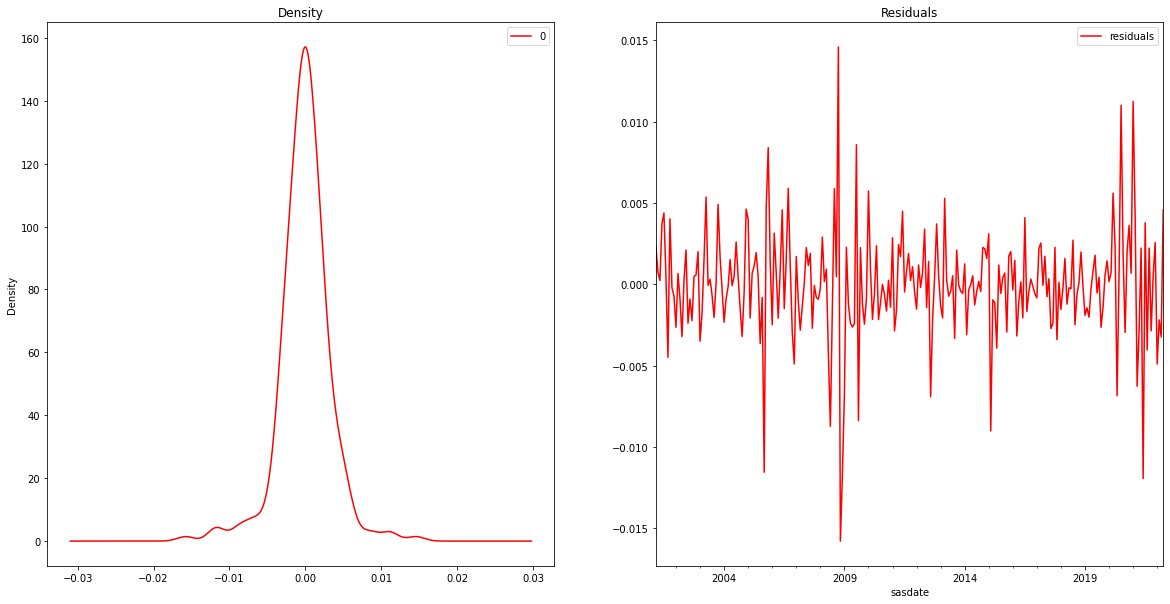

In [34]:
pred_df = pd.DataFrame(predictions_real)
observed_df = pd.DataFrame(observed_real)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

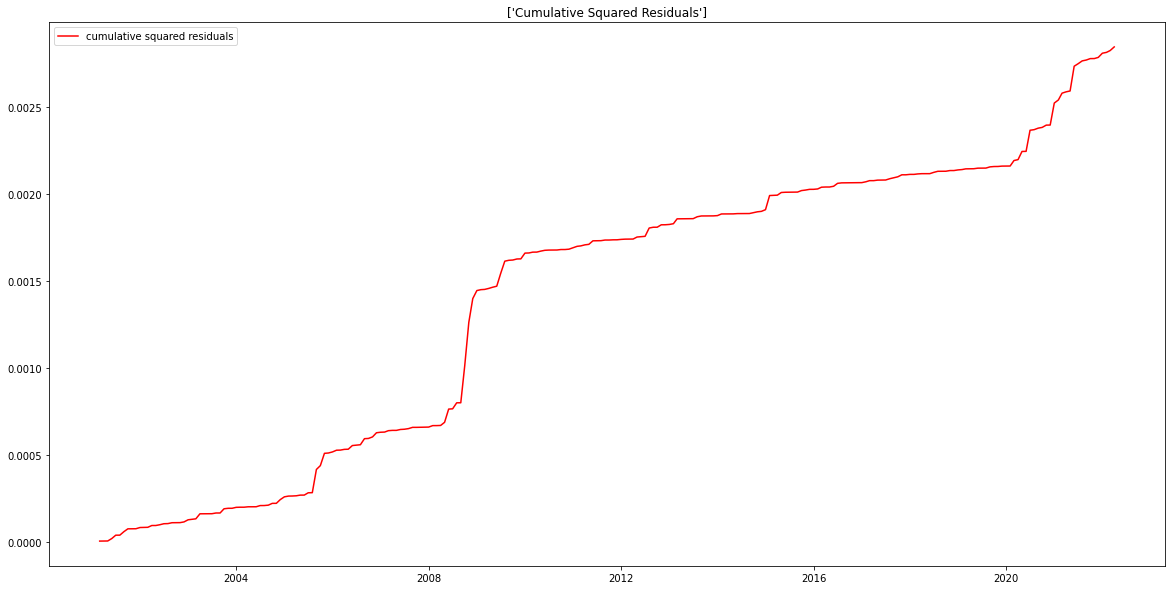

In [35]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [36]:
pred = pd.DataFrame(predictions_real)
observedd = pd.DataFrame(observed_real)

In [37]:
pred.shape, observedd.shape, date.shape 

((254, 1), (254, 1), (254, 1))

In [38]:
date.shape

(254, 1)

In [39]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [40]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])

In [41]:
df.head()

,0_x,0_y
sasdate,,
2001-03-01,0.000621,-0.001705
2001-04-01,0.001889,0.001133
2001-05-01,0.003619,0.003375
2001-06-01,0.000918,-0.002825
2001-07-01,0.000445,-0.003942


In [42]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-03-01,0.000621,-0.001705
2001-04-01,0.001889,0.001133
2001-05-01,0.003619,0.003375
2001-06-01,0.000918,-0.002825
2001-07-01,0.000445,-0.003942


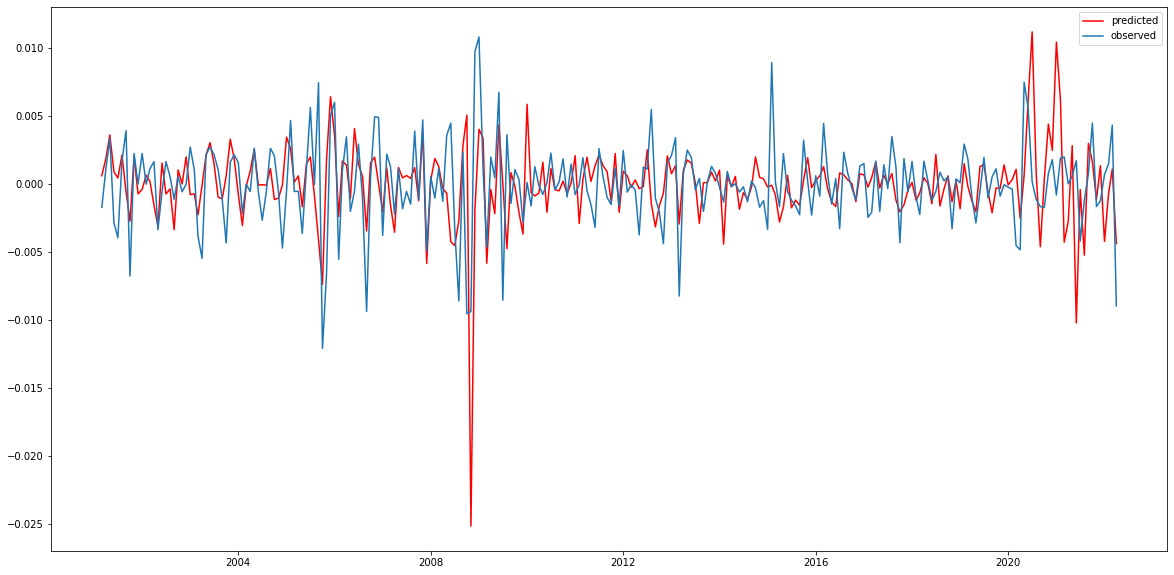

In [43]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

In [44]:
mse = mean_squared_error(observed_real, predictions_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(observed_real, predictions_real)
print('%f' % mse), print('%f' % mae), print('%f' % rmse)

0.000011
0.002248
0.003347


(None, None, None)

The Lasso Autoregressive Model seems to have been more accurate than the AR, PCR and Ridge, this can be seen graphically and confirmed by the smaller MSE. Lasso had an MSE of 0.81, RMSE of 0.90 and a MAE of 0.56, much lower than the errors presented by the other three models. However, it is still possible to observe jumps in the periods of 2008 and 2020, that is, the period of the international financial crisis and pandemic, respectively.

In [45]:
pred_lasso = df["pred"].copy()
pred_lasso.head()

sasdate
2001-03-01    0.000621
2001-04-01    0.001889
2001-05-01    0.003619
2001-06-01    0.000918
2001-07-01    0.000445
Name: pred, dtype: float64

In [46]:
pred_lasso.shape

(254,)

In [47]:
pred_lasso.to_csv("/content/drive/MyDrive/Trabalho-1/pred_lasso.csv", index = False)

<h3> b) <h3>

In [48]:
df_importances = pd.DataFrame(importance_agg, columns = cols_names)
df_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUEL

In [49]:
df_rel_importances = df_importances.copy()
df_rel_importances["sum"] = df_rel_importances.abs().sum(axis = 1)
df_rel_importances["sum"].head()

0    8.569459
1    8.576570
2    8.539159
3    8.523335
4    8.552600
Name: sum, dtype: float64

In [50]:
df_rel_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUEL

The importances are transformed to percentages.

In [51]:
for col in df_rel_importances.columns[:-1]:
  df_rel_importances[col] = (df_rel_importances[col].abs()*100)/df_rel_importances["sum"]
df_rel_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUEL

In [52]:
df_rel_importances["test"] = df_rel_importances.sum(axis = 1) - df_rel_importances["sum"]
df_rel_importances["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

In [53]:
df_rel_importances.shape

(254, 1353)

In [54]:
df_rel_importances = df_rel_importances.drop(columns = ["sum", "test"])
df_rel_importances.shape

(254, 1351)

Now, we aggregate the lags into the original variables. Remembering that as the variables are standardized in percentage of importance, their sum indicates the percentage of importance of the original variable and its lags.

In [55]:
lags_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_agg_lags = df_rel_importances.copy()
for col in df_agg_lags.columns[0: 103]:
  for i in lags_range:
    df_agg_lags[col] = df_agg_lags[col] + df_agg_lags[col + "_lag_" + str(i)]
    df_agg_lags = df_agg_lags.drop(columns = [col + "_lag_" + str(i)])

In [56]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12
0,0.228270,1.314744,1.033220,1.727601,0.0,0.000000,0.0,0.110438,0.081458,1.624691,0.029286,0.0,0.000000,0.542353,0.033307,0.588993,1.816310,0.0,2.816345,0.0,0.099003,0.221513,0.281335,1.069930,0.442487,1.006773,2.104268,0.858631,0.0,0.0,1.610554,0.894968,0.0,1.430979,1.315069,0.0,0.0,1.283619,0.199229,0.0,1.466771,0.423285,0.724491,0.0,0.0,0.0,0.481313,0.262687,0.0,0.695151,2.166094,0.0,0.0,3.201417,0.0,0.0,0.0,0.0,1.112587,0.131243,2.278360,3.417415,0.606981,1.945077,0.226136,2.033219,1.513000,2.213073,0.000000,0.0,0.0,0.825804,0.0,0.0,0.0,0.0,1.568445,3.052814,1.441591,1.328872,1.327381,1.505255,1.235393,0.343179,1.487570,0.811731,0.812405,0.0,2.675949,0.112946,1.220319,1.139526,2.328070,0.648485,0.559479,0.755733,1.193723,0.713348,1.874044,1.633072,2.924152,1.375778,1.258905,5.889807,3.220677,1.969219,0.670453,0.393671,0.331967,0.0,0.275205,0.339440,0.0,1.091921,0.0
1,0.223964,1.342397,1.030642,1.703526,0.0,0.000000,0.0,0.087958,0.117510,1.503870,0.057831,0.0,0.000000,0.503906,0.049753,0.621099,1.722763,0.0,2.790909,0.0,0.139777,0.241733,0.253847,1.078211,0.437222,1.019797,1.966278,0.802587,0.0,0.0,1.643523,0.856048,0.0,1.434613,1.290934,0.0,0.0,1.359287,0.192273,0.0,1.577638,0.374060,0.813888,0.0,0.0,0.0,0.479927,0.298338,0.0,0.709583,2.147693,0.0,0.0,3.032998,0.0,0.0,0.0,0.0,1.173756,0.133501,2.304504,3.580933,0.615054,1.955690,0.237244,1.975858,1.528408,2.241084,0.000000,0.0,0.0,0.714185,0.0,0.0,0.0,0.0,1.564354,2.902549,1.453815,1.180030,1.288951,1.405165,1.265035,0.663544,1.501005,0.815971,0.778827,0.0,2.650187,0.078633,1.175167,1.057679,2.333775,0.451426,0.445625,0.883931,1.307350,0.795330,1.901328,1.657207,2.895791,1.379138,1.309696,5.944325,3.377503,2.023575,0.751828,0.443592,0.269550,0.0,0.297260,0.247958,0.0,1.136301,0.0
2,0.204807,1.391843,0.893023,1.676449,0.0,0.010937,0.0,0.128533,0.150155,1.424167,0.060415,0.0,0.021943,0.471966,0.012764,0.672482,1.674248,0.0,2.754938,0.0,0.168640,0.268275,0.177295,1.047503,0.275345,1.144357,2.113886,0.822157,0.0,0.0,1.593064,0.785819,0.0,1.705499,1.203312,0.0,0.0,1.341550,0.218352,0.0,1.589456,0.335536,0.861234,0.0,0.0,0.0,0.462608,0.218048,0.0,0.704050,2.382147,0.0,0.0,3.090228,0.0,0.0,0.0,0.0,1.228000,0.123333,2.316509,3.681678,0.591539,1.868328,0.185552,1.951743,1.437602,2.271852,0.026486,0.0,0.0,0.657714,0.0,0.0,0.0,0.0,1.477754,3.072117,1.431967,1.187550,1.335655,1.554615,1.300716,0.762558,1.541392,0.865109,0.729169,0.0,2.748463,0.092356,1.082073,0.987852,2.359354,0.250504,0.505561,0.764332,1.222987,0.886431,1.963347,1.535535,2.940839,1.376109,1.309852,5.954829,3.367135,1.962587,0.673136,0.350465,0.290857,0.0,0.303647,0.286758,0.0,1.129020,0.0
3,0.211043,1.406536,0.918538,1.695739,0.0,0.019887,0.0,0.119006,0.160704,1.389622,0.057761,0.0,0.000000,0.505827,0.021880,0.649479,1.680749,0.0,2.747998,0.0,0.169069,0.291614,0.160472,1.047323,0.268885,1.135229,2.107149,0.8353

In [57]:
df_agg_lags.shape

(254, 115)

Adding the columns per row to confirm the total is 100.

In [58]:
df_agg_lags["test"] = df_agg_lags.sum(axis = 1)
df_agg_lags["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

We already know what variables we need to change name

In [59]:
df_agg_lags = df_agg_lags.rename(columns = {"IPB51222S" : "IPB51222s", "CUSR0000SAD" : "CUUR0000SAD", "CUSR0000SA0L2" : "CUUR0000SA0L2"})

In [60]:
Output_and_Income = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"]

Labor_Market = ["CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN",
           "CES0600000008", "CES2000000008", "CES3000000008"]

Consumption_and_Orders = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW"]

Orders_and_Inventories =  ["DPCERA3M086SBEA", "RETAILx", "AMDMNOx",
            "AMDMUOx"]

Money_and_Credit = ["M1SL", "M2SL", "M2REAL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN",
           "INVEST"] 

Interest_and_Exhange = ["FEDFUNDS", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

Prices = ["OILPRICEx", "PPICMM", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

Stock_Market = ["S&P 500", "S&P: indust"] 

Lags_CPI = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11"]

Others = ["BOGMBASE", "WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62"]

In [61]:
groups = [Output_and_Income, Labor_Market, Consumption_and_Orders, Orders_and_Inventories, Money_and_Credit,
          Interest_and_Exhange, Prices, Stock_Market, Lags_CPI, Others]

list_groups = []

for group in groups:
  g = df_agg_lags[group].sum(axis = 1)
  list_groups.append(g)

list_groups_transpose = np.transpose(list_groups)
list_groups_df = pd.DataFrame(list_groups_transpose)
list_groups_df

list_groups_df["test"] = list_groups_df.sum(axis = 1)
list_groups_df

,0,1,2,3,4,5,6,7,8,9,test
0,6.369850,24.182250,0.744000,5.622066,5.572908,20.172428,16.333329,2.409603,14.182359,4.411208,100.000000
1,6.231052,24.204761,0.778264,5.591443,5.516449,19.949204,16.176235,2.438005,14.491892,4.622695,100.000000
2,6.224260,24.258699,0.680656,5.655669,5.628080,19.841885,15.998931,2.439842,14.318433,4.953544,100.000000
3,6.222495,24.147463,0.704232,5.690043,5.670969,19.790873,16.108502,2.448633,14.304243,4.912547,100.000000
4,6.913217,24.288415,0.679274,5.993261,5.039948,19.395014,16.294876,2.392668,14.747751,4.255575,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
249,14.602241,15.698262,2.148859,6.737641,16.923112,13.023334,15.601582,2.381342,9.400981,3.363767,99.881120
250,14.652929,15.751660,2.103321,6.587522,17.275090,12.948955,15.644327,2.500103,9.422221,3.023300,99.909427
251,14.873254,15.726765,2.559661,6.864437,17.254677,13.078352,14.567608,2.393389,9.965033,2.716825,100.000000
252,15.230165,16.144006,2.586092,6.833997,17.103523,12.618315,14.335220,2.364491,10.077494,2.706155,99.999457


In [62]:
groups_importances = list_groups_df.drop(columns = ["test"])
groups_importances = groups_importances.rename(columns = {0 : "Output_and_Income", 1 : "Labor_Market", 2 : "Consumption_and_Orders",
                                                          3 : "Orders_and_Inventories", 4 : "Money_and_Credit", 5 : "Interest_and_Exhange",
                                                          6 : "Prices", 7 : "Stock_Market", 8 : "Lags_CPI", 9 : "Others"})
groups_importances.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
0,6.369850,24.182250,0.744000,5.622066,5.572908,20.172428,16.333329,2.409603,14.182359,4.411208
1,6.231052,24.204761,0.778264,5.591443,5.516449,19.949204,16.176235,2.438005,14.491892,4.622695
2,6.224260,24.258699,0.680656,5.655669,5.628080,19.841885,15.998931,2.439842,14.318433,4.953544
3,6.222495,24.147463,0.704232,5.690043,5.670969,19.790873,16.108502,2.448633,14.304243,4.912547
4,6.913217,24.288415,0.679274,5.993261,5.039948,19.395014,16.294876,2.392668,14.747751,4.255575


In [63]:
groups_importances_date = date.merge(groups_importances, left_index = True, right_index = True, how = "left")
groups_importances_date.index = pd.DatetimeIndex(groups_importances_date["sasdate"])
groups_importances_date = groups_importances_date.drop(columns = ["sasdate"])
groups_importances_date.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
sasdate,,,,,,,,,,
2001-03-01,6.369850,24.182250,0.744000,5.622066,5.572908,20.172428,16.333329,2.409603,14.182359,4.411208
2001-04-01,6.231052,24.204761,0.778264,5.591443,5.516449,19.949204,16.176235,2.438005,14.491892,4.622695
2001-05-01,6.224260,24.258699,0.680656,5.655669,5.628080,19.841885,15.998931,2.439842,14.318433,4.953544
2001-06-01,6.222495,24.147463,0.704232,5.690043,5.670969,19.790873,16.108502,2.448633,14.304243,4.912547
2001-07-01,6.913217,24.288415,0.679274,5.993261,5.039948,19.395014,16.294876,2.392668,14.747751,4.255575


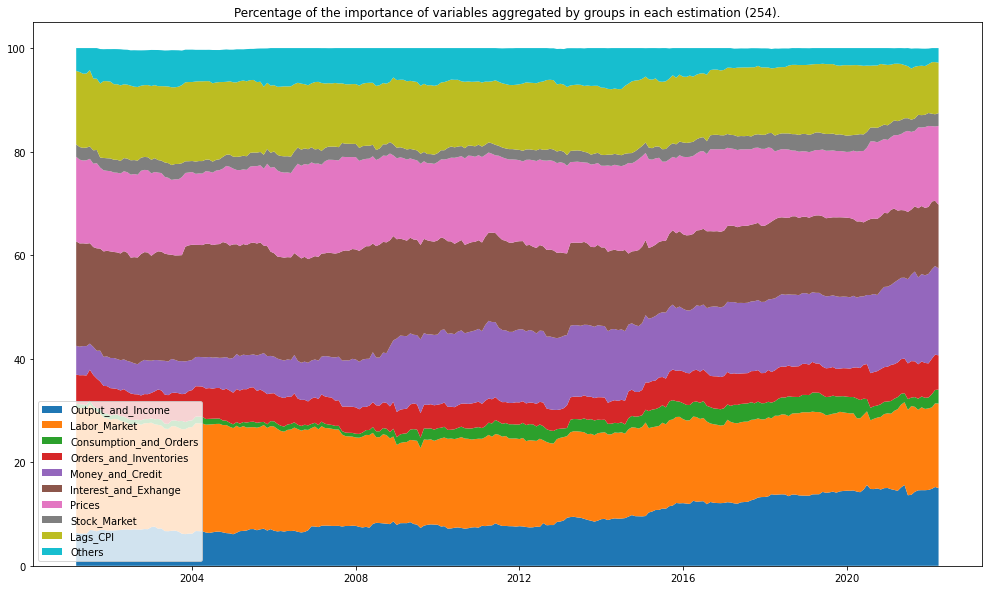

In [64]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

plt.stackplot(groups_importances_date.index,groups_importances_date["Output_and_Income"], groups_importances_date["Labor_Market"], groups_importances_date["Consumption_and_Orders"],
              groups_importances_date["Orders_and_Inventories"], groups_importances_date["Money_and_Credit"], groups_importances_date["Interest_and_Exhange"], groups_importances["Prices"],
              groups_importances_date["Stock_Market"], groups_importances_date["Lags_CPI"], groups_importances_date["Others"], labels = groups_importances.columns)

plt.title('Percentage of the importance of variables aggregated by groups in each estimation (254).')
plt.legend(loc= "lower left")

Again, we can see a small increase in the importance of the labor market group in inflation. 